Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Dataset Url

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

Dataset columns

In [3]:
columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']

Loading Data with Pandas 

In [4]:
df = pd.read_csv(url,names=columns)

In [5]:
df.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  salary  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

Dataset Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Dataset Shape

In [7]:
df.shape

(32561, 15)

Dataset Description

In [8]:
df.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [9]:
df.size

488415

### Feature Engineering

Checking for null Values 

In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [11]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

Replacing ' ?' with Nan for data cleaning

In [12]:
df.replace(' ?',np.nan,inplace=True)

In [13]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [14]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

#### Salary

In [15]:
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [16]:
df = df.replace({' <=50K':0,' >50K':1})

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='count'>

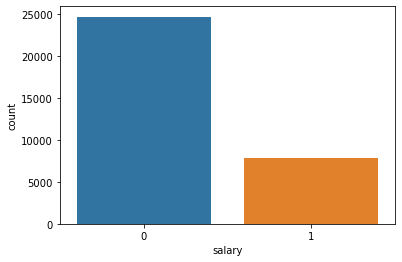

In [17]:
sns.countplot(df['salary'])

In [18]:
df['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

#### Workclass

In [19]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [20]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [21]:
df= df.replace(' Without-pay', ' Never-worked')

In [22]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Never-worked           21
Name: workclass, dtype: int64

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' State-gov'),
  Text(1, 0, ' Self-emp-not-inc'),
  Text(2, 0, ' Private'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Never-worked')])

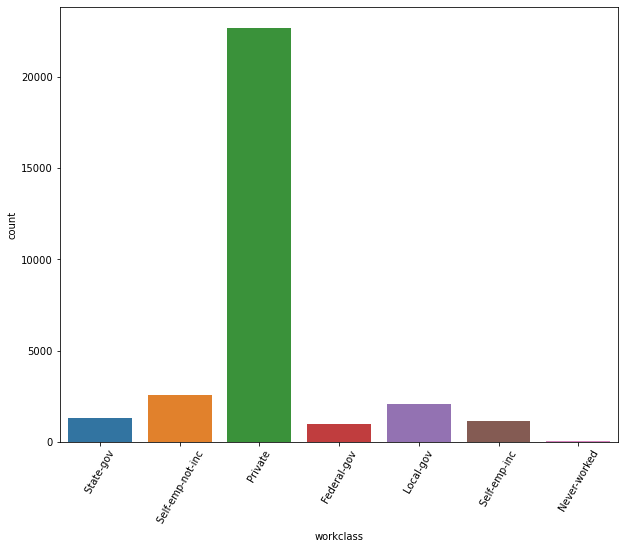

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(df['workclass'])
plt.xticks(rotation=60)

In [24]:
df['workclass'].fillna('0',inplace=True)

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' State-gov'),
  Text(1, 0, ' Self-emp-not-inc'),
  Text(2, 0, ' Private'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, '0'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Never-worked')])

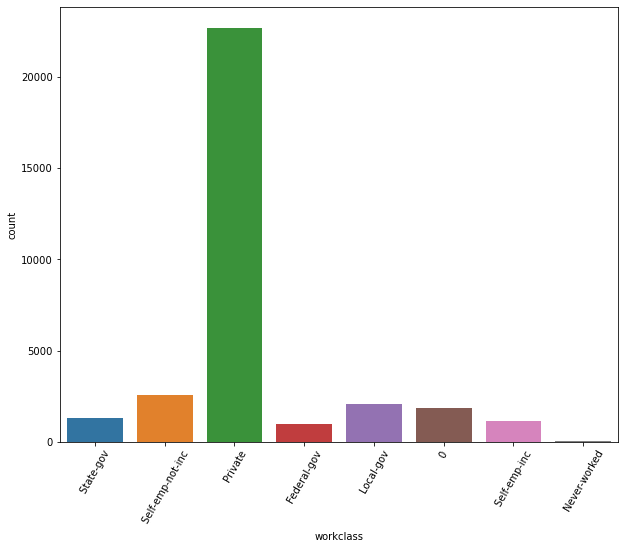

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(df['workclass'])
plt.xticks(rotation=60)

#### Fnlwgt

In [26]:
df['fnlwgt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

In [27]:
df['fnlwgt'] = df['fnlwgt'].apply(lambda x :np.log1p(x))

df['fnlwgt'].describe()

count    32561.000000
mean        11.983778
std          0.630738
min          9.416216
25%         11.676981
50%         12.091542
75%         12.376035
max         14.210727
Name: fnlwgt, dtype: float64

#### Education

In [28]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

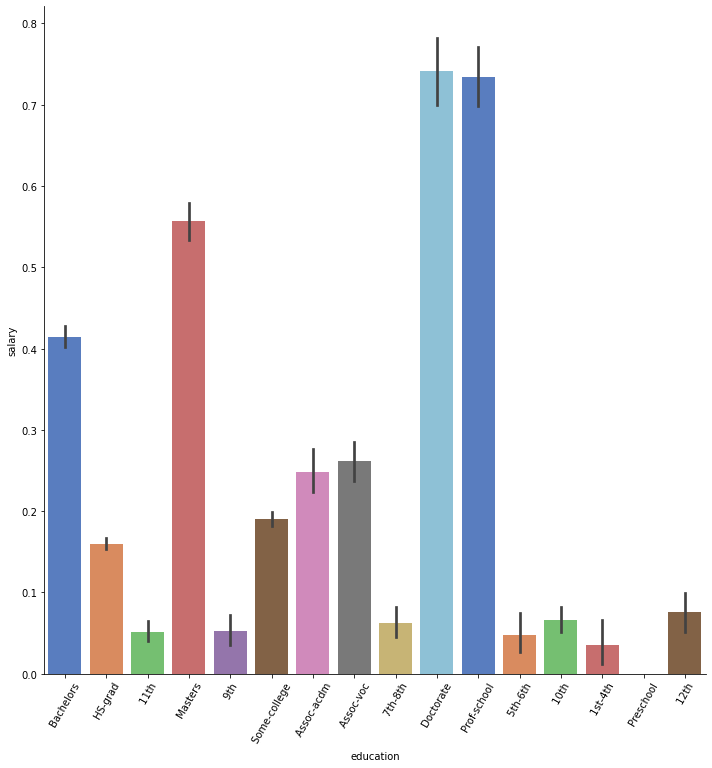

In [29]:
sns.catplot(x='education',y='salary',data=df,height=10,palette='muted',kind='bar')
plt.xticks(rotation=60)

In [30]:
def primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return 'Primary'
    else:
        return x

In [31]:
df['education'] = df['education'].apply(primary)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, 'Primary'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' Some-college'),
  Text(5, 0, ' Assoc-acdm'),
  Text(6, 0, ' Assoc-voc'),
  Text(7, 0, ' Doctorate'),
  Text(8, 0, ' Prof-school'),
  Text(9, 0, ' Preschool')])

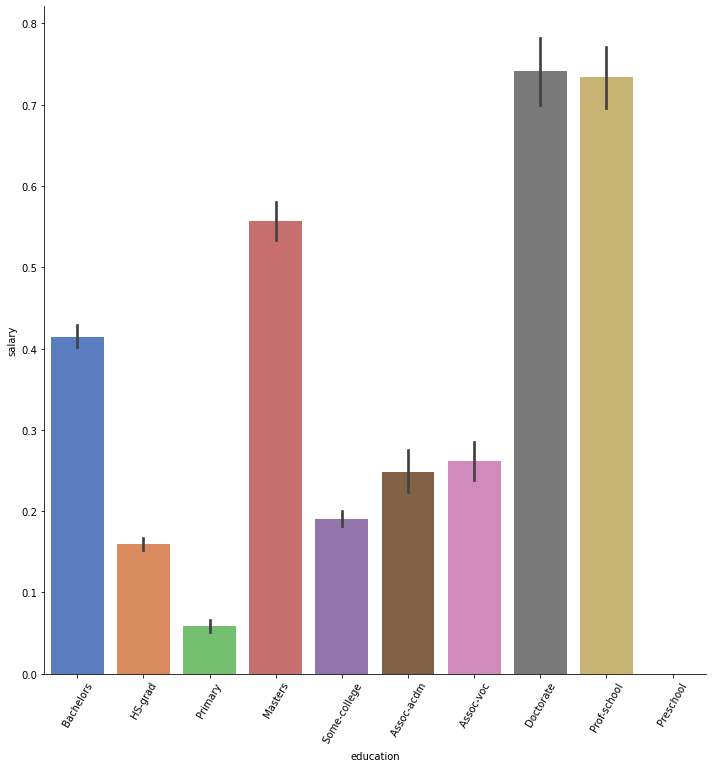

In [32]:
sns.catplot(x='education',y='salary',data=df,height=10,palette='muted',kind='bar')
plt.xticks(rotation=60)

#### Marital-status

In [33]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [34]:
df['marital-status'].replace(' Married-AF-spouse', ' Married-civ-spouse',inplace=True)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Never-married'),
  Text(1, 0, ' Married-civ-spouse'),
  Text(2, 0, ' Divorced'),
  Text(3, 0, ' Married-spouse-absent'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Widowed')])

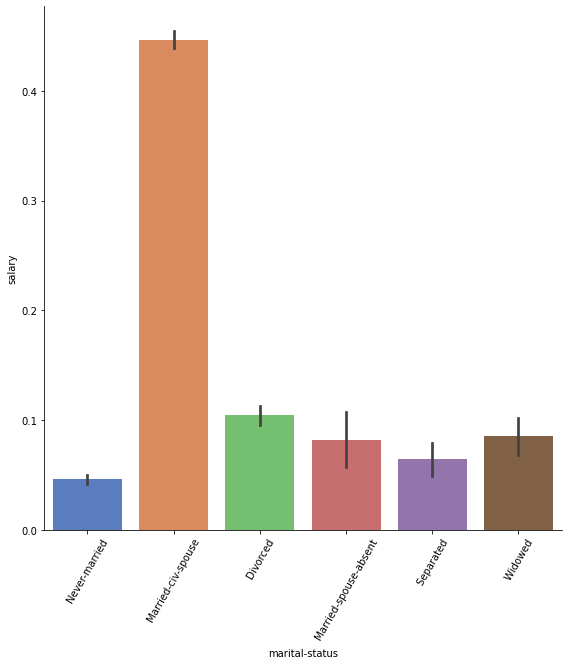

In [35]:
sns.catplot(x='marital-status',y='salary',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=60)

#### Occupation

In [36]:
df['occupation'].fillna('0',inplace=True)

df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
0                     1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [37]:
df['occupation'].replace(' Armed-Forces','0',inplace=True)

df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
0                     1852
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
Name: occupation, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Exec-managerial'),
  Text(2, 0, ' Handlers-cleaners'),
  Text(3, 0, ' Prof-specialty'),
  Text(4, 0, ' Other-service'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, '0'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Priv-house-serv')])

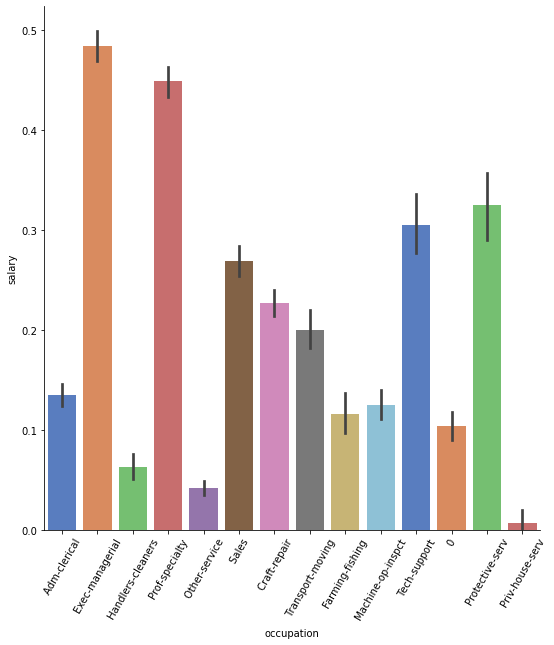

In [38]:
sns.catplot(x='occupation',y='salary',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=60)

#### Relationship

In [39]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

#### Race

In [40]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

#### Sex

In [41]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [42]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

#### Native-Country

In [43]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [44]:
def native(country):
    if country in [' United-States',' Canada']:
        return 'North_America'
    elif country in [' Puerto-Rico',' El-Salvador',' Cuba',' Jamaica',' Dominican-Republic',' Guatemala',' Haiti',' Nicaragua',' Trinadad&Tobago',' Honduras']:
        return 'Central_America' 
    elif country in [' Mexico',' Columbia',' Vietnam',' Peru',' Ecuador',' South',' Outlying-US(Guam-USVI-etc)']:
        return 'South_America'
    elif country in [' Germany',' England',' Italy',' Poland',' Portugal',' Greece',' Yugoslavia',' France',' Ireland',' Scotland',' Hungary',' Holand-Netherlands']:
        return 'EU'
    elif country in [' India',' Iran',' China',' Japan',' Thailand',' Hong',' Cambodia',' Laos',' Philippines',' Taiwan']:
        return 'Asian'
    else:
        return country

In [45]:
df['native-country'] = df['native-country'].apply(native)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'North_America'),
  Text(1, 0, 'Central_America'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'South_America'),
  Text(4, 0, 'EU')])

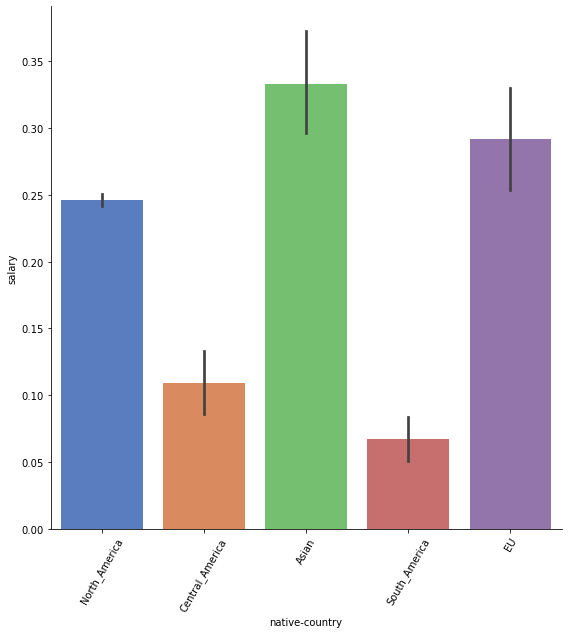

In [46]:
sns.catplot(x='native-country',y='salary',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=60)

Let's check our data's correlation with the help of Heatmap

<AxesSubplot:>

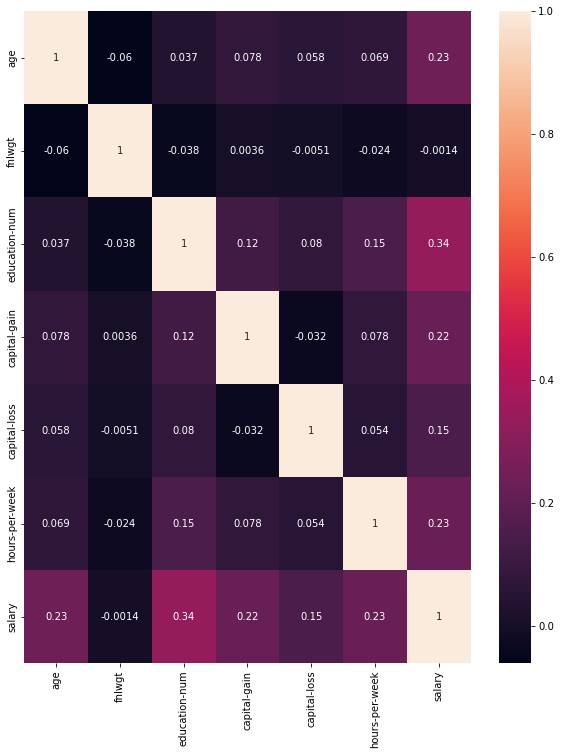

In [47]:
corr = df.corr()
plt.figure(figsize=(10,12))
sns.heatmap(corr,annot=True)

As we can see that corr values of fnlwgt are very low, Hence we can drop it safely.

In [48]:
df.drop('fnlwgt',axis=1,inplace=True)

In [49]:
df.head()

age          workclass   education  education-num       marital-status  \
0   39          State-gov   Bachelors             13        Never-married   
1   50   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
2   38            Private     HS-grad              9             Divorced   
3   53            Private     Primary              7   Married-civ-spouse   
4   28            Private   Bachelors             13   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   capital-loss  hours-per-week   native-country  salary  
0             0              40    North_America       0  
1             0              13    North_America       0  
2             0              40    North_America       0  
3             0              40    North_America       0  
4             0              40  Central_America       0

### Dividing Data into 'X' and 'y'

In [50]:
X = df.drop('salary',axis=1)
y = df['salary']

In [51]:
X.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

Converting Categorical data into Numerical Data 

In [52]:
X_d = pd.get_dummies(X)

In [53]:
X_d.head()

age  education-num  capital-gain  capital-loss  hours-per-week  \
0   39             13          2174             0              40   
1   50             13             0             0              13   
2   38              9             0             0              40   
3   53              7             0             0              40   
4   28             13             0             0              40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   
1                       0                     0                        0   
2                       0                     0                        0   
3                       0                     0                        0   
4                       0                     0                        0   

   workclass_ Private  workclass_ Self-emp-inc  ...  race_ Black  race_ Other  \
0                   0                        0  ...            0            0   
1                   0                        0  ...            0            0   
2                   1                        0  ...            0            0   
3                   1                        0  ...            1            0   
4                   1                        0  ...            1            0   

   race_ White  sex_ Female  sex_ Male  native-country_Asian  \
0            1            0          1                     0   
1            1            0          1                     0   
2            1            0          1                     0   
3            0            0          1                     0   
4            0            1          0                     0   

   native-country_Central_America  native-country_EU  \
0                               0                  0   
1                               0                  0   
2                               0                  0   
3                               0                  0   
4                               1                  0   

   native-country_North_America  native-country_South_America  
0                             1                             0  
1                             1                             0  
2                             1                             0  
3                             1                             0  
4                             0                             0  

[5 rows x 61 columns]

#### Train_Test_Split

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_d,y,test_size=0.3,random_state=101)

In [55]:
x_train.shape

(22792, 61)

In [56]:
y_train.shape

(22792,)

#### On Applying Algorithms & Evaluating the Models

### 1. Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(x_train,y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Applying Hyperparams for LogReg model to get best model score

In [58]:
penalty = ['l1', 'l2']
# C is the inverese of regularization parameter
C = np.logspace(0, 4, 10)
random_state=[0]
# creating a dictionary of hyperparameters
hyperparameters = dict(C=C, penalty=penalty, 
                  random_state=random_state)

### GridSearchCV for LogReg

In [59]:
from sklearn.model_selection import GridSearchCV
gsv = GridSearchCV(Lr,param_grid=hyperparameters,cv=5,verbose=3,n_jobs=-1)
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'random_state': [0]},
             verbose=3)

Best_params

In [60]:
gsv.best_params_

{'C': 2.7825594022071245, 'penalty': 'l2', 'random_state': 0}

In [63]:
lr_tuned = LogisticRegression(C=1.0,penalty='l2',random_state=0)

In [64]:
lr_tuned.fit(x_train,y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [65]:
Log_Reg =lr_tuned.score(x_test,y_test)

In [66]:
lr_y_pred = lr_tuned.predict(x_test)

### Logistic Regression Model Evaluation

In [67]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc
print(f"Accuracy_Score:{accuracy_score(y_test,lr_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,lr_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,lr_y_pred)}")

Accuracy_Score:0.8298699969290613
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.86      0.92      0.89      7436
           1       0.68      0.54      0.60      2333

    accuracy                           0.83      9769
   macro avg       0.77      0.73      0.75      9769
weighted avg       0.82      0.83      0.82      9769

**************************************************
Confusion_Matrix:[[6850  586]
 [1076 1257]]


### 2. Decision Tree 

In [68]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

#### Applying grid_params with GridsearchCv for DTC model to get best model score

In [69]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,2),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [70]:
gsv = GridSearchCV(dtc,param_grid=grid_param,cv=5,verbose=3,n_jobs=-1)
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits
[CV 5/5] END ...C=1.0, penalty=l1, random_state=0;, score=nan total time=   0.0s
[CV 2/5] END C=2.7825594022071245, penalty=l1, random_state=0;, score=nan total time=   0.0s
[CV 3/5] END C=2.7825594022071245, penalty=l1, random_state=0;, score=nan total time=   0.0s
[CV 1/5] END C=2.7825594022071245, penalty=l2, random_state=0;, score=0.834 total time=   0.4s
[CV 2/5] END C=7.742636826811269, penalty=l2, random_state=0;, score=0.840 total time=   0.5s
[CV 1/5] END C=59.94842503189409, penalty=l1, random_state=0;, score=nan total time=   0.0s
[CV 4/5] END C=59.94842503189409, penalty=l1, random_state=0;, score=nan total time=   0.0s
[CV 1/5] END C=59.94842503189409, penalty=l2, random_state=0;, score=0.821 total time=   0.5s
[CV 4/5] END C=464.15888336127773, penalty=l1, random_state=0;, score=nan total time=   0.0s
[CV 3/5] END C=464.15888336127773, penalty=l2, random_state=0;, score=0.846 total time=   0.4s
[CV 1/5] END

[CV 2/5] END ...C=1.0, penalty=l1, random_state=0;, score=nan total time=   0.0s
[CV 4/5] END .C=1.0, penalty=l2, random_state=0;, score=0.826 total time=   0.4s
[CV 1/5] END C=7.742636826811269, penalty=l1, random_state=0;, score=nan total time=   0.0s
[CV 2/5] END C=7.742636826811269, penalty=l1, random_state=0;, score=nan total time=   0.0s
[CV 5/5] END C=7.742636826811269, penalty=l1, random_state=0;, score=nan total time=   0.0s
[CV 4/5] END C=7.742636826811269, penalty=l2, random_state=0;, score=0.831 total time=   0.5s
[CV 3/5] END C=59.94842503189409, penalty=l1, random_state=0;, score=nan total time=   0.0s
[CV 2/5] END C=59.94842503189409, penalty=l2, random_state=0;, score=0.838 total time=   0.3s
[CV 4/5] END C=166.81005372000593, penalty=l2, random_state=0;, score=0.827 total time=   0.4s
[CV 5/5] END C=464.15888336127773, penalty=l2, random_state=0;, score=0.835 total time=   0.5s
[CV 5/5] END C=3593.813663804626, penalty=l2, random_state=0;, score=0.841 total time=   0.3

[CV 1/5] END ...C=1.0, penalty=l1, random_state=0;, score=nan total time=   0.0s
[CV 5/5] END C=2.7825594022071245, penalty=l1, random_state=0;, score=nan total time=   0.0s
[CV 2/5] END C=2.7825594022071245, penalty=l2, random_state=0;, score=0.837 total time=   0.4s
[CV 5/5] END C=7.742636826811269, penalty=l2, random_state=0;, score=0.828 total time=   0.5s
[CV 2/5] END C=59.94842503189409, penalty=l1, random_state=0;, score=nan total time=   0.0s
[CV 5/5] END C=59.94842503189409, penalty=l1, random_state=0;, score=nan total time=   0.0s
[CV 3/5] END C=59.94842503189409, penalty=l2, random_state=0;, score=0.842 total time=   0.3s
[CV 5/5] END C=166.81005372000593, penalty=l2, random_state=0;, score=0.839 total time=   0.4s
[CV 4/5] END C=1291.5496650148827, penalty=l1, random_state=0;, score=nan total time=   0.0s
[CV 2/5] END C=1291.5496650148827, penalty=l2, random_state=0;, score=0.829 total time=   0.3s
[CV 3/5] END C=3593.813663804626, penalty=l2, random_state=0;, score=0.846 t

[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.841 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.835 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.822 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.819 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.822 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.818 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=

[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.845 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.844 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.841 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.848 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.845 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.844 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.841 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=6, splitte

[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.823 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.809 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.820 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.812 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.820 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.835 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.823 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_sp

[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.823 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.829 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.822 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.820 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.821 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.820 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.826 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_sp

[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.830 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.823 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=3, splitter=random;, score=0.835 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=3, splitter=random;, score=0.824 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=3, splitter=random;, score=0.830 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=3, splitter=random;, score=0.831 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=4, splitter=best;, score=0.854 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_spli

[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.855 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.855 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.851 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=2, splitter=best;, score=0.854 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=2, splitter=best;, score=0.855 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=2, splitter=best;, score=0.855 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=2, splitter=best;, score=0.851 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=2, splitte

[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=5, splitter=best;, score=0.855 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=5, splitter=best;, score=0.851 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=5, splitter=best;, score=0.848 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=5, splitter=random;, score=0.832 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=5, splitter=random;, score=0.832 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=5, splitter=random;, score=0.829 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=5, splitter=random;, score=0.837 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=5,

[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=9, splitter=best;, score=0.854 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=9, splitter=best;, score=0.855 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=7, splitter=random;, score=0.826 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=7, splitter=random;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=7, splitter=random;, score=0.834 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=7, splitter=random;, score=0.840 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=8, splitter=best;, score=0.854 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=8,

[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=4, splitter=random;, score=0.828 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=4, splitter=random;, score=0.826 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=4, splitter=random;, score=0.821 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=4, splitter=random;, score=0.830 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=4, splitter=random;, score=0.828 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=5, splitter=best;, score=0.854 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=5, splitter=best;, score=0.855 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=

[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=6, splitter=random;, score=0.826 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=7, splitter=best;, score=0.854 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=7, splitter=best;, score=0.855 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=7, splitter=best;, score=0.855 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=7, splitter=best;, score=0.851 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=7, splitter=best;, score=0.848 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=7, splitter=random;, score=0.819 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=5, spl

[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=9, min_samples_split=7, splitter=best;, score=0.854 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=9, min_samples_split=7, splitter=best;, score=0.858 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=9, min_samples_split=7, splitter=best;, score=0.858 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=9, min_samples_split=7, splitter=best;, score=0.851 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=9, min_samples_split=7, splitter=best;, score=0.849 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=9, min_samples_split=7, splitter=random;, score=0.830 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.859 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, spl

[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.837 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.844 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.852 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.852 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.842 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.844 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.851 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_

[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=9, min_samples_split=8, splitter=random;, score=0.837 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=9, min_samples_split=8, splitter=random;, score=0.826 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=9, min_samples_split=8, splitter=random;, score=0.839 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=9, min_samples_split=8, splitter=random;, score=0.838 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=9, min_samples_split=8, splitter=random;, score=0.835 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=9, min_samples_split=9, splitter=best;, score=0.853 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=9, min_samples_split=9, splitter=best;, score=0.858 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split

[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.852 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.852 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.858 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.850 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.854 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.845 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.859 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=

[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.840 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.841 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.842 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.837 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.851 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.853 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.843 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_sample

[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.860 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.851 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.857 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.838 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.857 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.837 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.841 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_sp

[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.856 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.850 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.848 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.846 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.856 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.851 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.854 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2,

[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.845 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.848 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.851 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.849 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.847 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.857 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.850 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_sp

[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.847 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.846 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.858 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.847 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.853 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.839 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.838 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_spli

[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.846 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.855 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.850 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.856 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.849 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.854 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.842 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=

[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.854 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.835 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.847 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.845 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.858 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.847 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.853 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=

[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.858 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.846 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.858 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.847 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.854 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.842 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.836 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_spli

[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=6, min_samples_split=2, splitter=best;, score=0.847 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=6, min_samples_split=2, splitter=best;, score=0.857 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=6, min_samples_split=2, splitter=best;, score=0.849 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=6, min_samples_split=2, splitter=best;, score=0.855 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.839 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.840 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.838 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=6, min_samples_sp

[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=7, min_samples_split=3, splitter=best;, score=0.850 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=14, min_samples_leaf=7, min_samples_split=3, splitter=best;, score=0.840 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=7, min_samples_split=3, splitter=best;, score=0.857 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=14, min_samples_leaf=7, min_samples_split=3, splitter=best;, score=0.847 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=14, min_samples_leaf=7, min_samples_split=3, splitter=best;, score=0.857 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=7, min_samples_split=3, splitter=random;, score=0.840 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=7, min_samples_split=9, splitter=best;, score=0.857 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=14, min_samples_leaf=7, min_samples_split=

[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=7, min_samples_split=6, splitter=random;, score=0.846 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=14, min_samples_leaf=7, min_samples_split=6, splitter=random;, score=0.840 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=7, min_samples_split=6, splitter=random;, score=0.841 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.860 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.848 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.856 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.839 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_

[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=3, splitter=random;, score=0.845 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=3, splitter=random;, score=0.843 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=3, splitter=random;, score=0.850 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.850 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.842 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.859 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.848 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=14, min_samples_leaf=9, min_samples_sp

[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=7, min_samples_split=7, splitter=best;, score=0.858 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=14, min_samples_leaf=7, min_samples_split=7, splitter=best;, score=0.848 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=14, min_samples_leaf=7, min_samples_split=7, splitter=best;, score=0.857 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=7, min_samples_split=7, splitter=random;, score=0.842 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.856 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.844 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.835 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_sp

[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=6, splitter=random;, score=0.838 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=6, splitter=random;, score=0.843 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=6, splitter=random;, score=0.849 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=14, min_samples_leaf=9, min_samples_split=4, splitter=best;, score=0.855 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=9, min_samples_split=4, splitter=random;, score=0.837 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=14, min_samples_leaf=9, min_samples_split=4, splitter=random;, score=0.831 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=9, min_samples_split=4, splitter=random;, score=0.846 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=14, min_samples_leaf=9, min_samp

[CV 5/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=9, splitter=best;, score=0.856 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=9, splitter=random;, score=0.833 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=9, splitter=random;, score=0.841 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=9, splitter=random;, score=0.842 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=9, splitter=random;, score=0.848 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=9, splitter=random;, score=0.848 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=14, min_samples_leaf=9, min_samples_split=7, splitter=random;, score=0.839 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=9, min_samp

[CV 1/5] END criterion=gini, max_depth=16, min_samples_leaf=9, min_samples_split=9, splitter=best;, score=0.843 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=16, min_samples_leaf=9, min_samples_split=9, splitter=best;, score=0.843 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.836 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.847 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.834 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.834 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.839 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_spli

[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.834 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.849 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.832 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.833 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.848 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.833 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.847 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_spli

[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.837 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.849 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.835 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.831 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.845 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.828 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.847 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_spli

[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.837 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.836 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.841 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.836 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.838 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.830 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.828 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=4, min_sample

[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.835 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.834 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.838 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.840 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.842 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.850 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.832 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_

[CV 2/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.828 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.843 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.834 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.851 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.837 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.831 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.827 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_sp

[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.808 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.758 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.758 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.793 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.758 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.828 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.825 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_le

[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.820 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.808 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.758 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.808 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.820 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.758 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf

[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.820 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.758 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.758 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.820 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.758 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf

[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.843 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.845 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.843 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.845 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.843 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.841 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.835 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_

[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.816 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.820 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.819 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.827 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.816 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.824 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.814 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_sample

[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=3, splitter=random;, score=0.808 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=3, splitter=random;, score=0.822 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=3, splitter=random;, score=0.790 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=4, splitter=best;, score=0.828 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=4, splitter=best;, score=0.825 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=4, splitter=best;, score=0.829 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=4, splitter=best;, score=0.799 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=8

[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=8, splitter=best;, score=0.828 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=8, splitter=best;, score=0.825 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=8, splitter=best;, score=0.829 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=8, splitter=best;, score=0.799 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=8, min_samples_split=6, splitter=random;, score=0.758 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=8, min_samples_split=6, splitter=random;, score=0.758 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=8, min_samples_split=7, splitter=best;, score=0.828 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf=8, 

[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=3, splitter=best;, score=0.845 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=3, splitter=best;, score=0.843 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=3, splitter=best;, score=0.841 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=3, splitter=best;, score=0.836 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=3, splitter=random;, score=0.816 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=9, splitter=best;, score=0.843 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=9, splitter=best;, score=0.841 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=7, mi

[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=3, splitter=best;, score=0.841 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=3, splitter=best;, score=0.836 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=3, splitter=random;, score=0.819 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=2, splitter=best;, score=0.843 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=2, splitter=best;, score=0.845 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=2, splitter=best;, score=0.843 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=2, splitter=best;, score=0.841 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, mi

[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=9, splitter=random;, score=0.817 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=9, splitter=random;, score=0.819 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=7, splitter=random;, score=0.809 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=7, splitter=random;, score=0.825 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=7, splitter=random;, score=0.824 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=7, splitter=random;, score=0.816 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=8, splitter=best;, score=0.843 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_

[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=4, splitter=random;, score=0.821 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=4, splitter=random;, score=0.820 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=4, splitter=random;, score=0.816 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=5, splitter=best;, score=0.843 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=5, splitter=best;, score=0.845 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.851 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.856 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=1

[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.824 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.814 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.841 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.837 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.834 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_sample

[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.828 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.851 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.856 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.851 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.850 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=6, splitter=best;, score=0.851 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=6, splitter=best;, score=0.855 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=6, mi

[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.829 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.850 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.856 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.854 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.850 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.848 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.826 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=1, 

[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.843 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.848 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.835 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.828 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.834 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.830 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.841 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_

[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.830 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.832 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.843 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.839 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.820 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.836 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.838 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_sample

[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.847 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.826 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.830 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.832 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.847 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.831 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.832 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_le

[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.850 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.848 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.837 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.855 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.850 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.848 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.826 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=4, 

[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.832 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.841 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.833 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.841 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.835 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.833 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.835 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=8, min_sample

[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.856 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.850 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.847 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.841 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.842 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.848 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.835 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf

[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.857 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.841 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.856 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.852 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.857 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.834 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.829 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, min_sample

[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=2, splitter=best;, score=0.850 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=2, splitter=best;, score=0.855 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=2, splitter=best;, score=0.858 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=2, splitter=best;, score=0.853 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=2, splitter=best;, score=0.857 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.841 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.839 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_

[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=5, splitter=best;, score=0.853 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=5, splitter=best;, score=0.856 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.835 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.836 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.834 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.846 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.842 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=10, min_sa

[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=7, splitter=best;, score=0.857 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=7, splitter=random;, score=0.830 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=7, min_samples_split=4, splitter=best;, score=0.856 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=7, min_samples_split=4, splitter=random;, score=0.835 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=7, min_samples_split=4, splitter=random;, score=0.831 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=7, min_samples_split=4, splitter=random;, score=0.840 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=7, min_samples_split=4, splitter=random;, score=0.842 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=10, min_sa

[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=7, min_samples_split=7, splitter=best;, score=0.856 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=7, min_samples_split=7, splitter=random;, score=0.841 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.860 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.853 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.856 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.836 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.834 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_sample

[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=8, min_samples_split=6, splitter=best;, score=0.855 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=8, min_samples_split=6, splitter=best;, score=0.860 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=8, min_samples_split=6, splitter=best;, score=0.853 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=8, min_samples_split=6, splitter=best;, score=0.856 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=8, min_samples_split=6, splitter=random;, score=0.840 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=8, min_samples_split=6, splitter=random;, score=0.830 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=8, min_samples_split=6, splitter=random;, score=0.835 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=10, min_sample

[CV 1/5] END criterion=entropy, max_depth=12, min_samples_leaf=7, min_samples_split=5, splitter=best;, score=0.846 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=12, min_samples_leaf=7, min_samples_split=5, splitter=best;, score=0.847 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.841 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.832 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=3, splitter=best;, score=0.847 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=3, splitter=best;, score=0.848 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=3, splitter=best;, score=0.858 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=12, min_samples_

[CV 2/5] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=7, splitter=random;, score=0.838 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=7, splitter=random;, score=0.843 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=7, splitter=random;, score=0.844 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=7, splitter=random;, score=0.847 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=8, splitter=best;, score=0.847 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=8, splitter=best;, score=0.848 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=8, splitter=best;, score=0.858 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=12, min_samp

[CV 4/5] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=7, splitter=best;, score=0.851 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=7, splitter=best;, score=0.853 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=7, splitter=random;, score=0.843 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=4, splitter=best;, score=0.851 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=4, splitter=random;, score=0.836 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=4, splitter=random;, score=0.830 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=4, splitter=random;, score=0.844 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, min_samp

[CV 5/5] END criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=2, splitter=random;, score=0.837 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=3, splitter=best;, score=0.848 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=3, splitter=best;, score=0.850 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=3, splitter=best;, score=0.856 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=3, splitter=best;, score=0.848 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=3, splitter=best;, score=0.851 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=3, splitter=random;, score=0.842 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=14, min_samples_

[CV 3/5] END criterion=entropy, max_depth=14, min_samples_leaf=9, min_samples_split=8, splitter=best;, score=0.854 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=14, min_samples_leaf=9, min_samples_split=8, splitter=best;, score=0.848 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.843 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.846 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.851 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.844 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.851 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf

[CV 4/5] END criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.848 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.851 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.836 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.837 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.847 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.842 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.854 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=14, min_sa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=3)

Bestparams

In [71]:
gsv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 3,
 'splitter': 'best'}

In [72]:
dtc_tuned = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=6,min_samples_split=2,splitter='best')

In [73]:
dtc_tuned.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=6)

In [74]:
Dtc = dtc_tuned.score(x_test,y_test)

### Decision Tree Classifier Model Evaluation

In [75]:
dtc_y_pred = dtc_tuned.predict(x_test)

In [76]:
print(f"Accuracy_Score:{accuracy_score(y_test,dtc_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,dtc_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,dtc_y_pred)}")

Accuracy_Score:0.8594533729143208
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7436
           1       0.77      0.58      0.66      2333

    accuracy                           0.86      9769
   macro avg       0.83      0.76      0.79      9769
weighted avg       0.85      0.86      0.85      9769

**************************************************
Confusion_Matrix:[[7043  393]
 [ 980 1353]]


### 3. Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

#### Applying grid_params with GridsearchCv for RFC model to get best model score

In [78]:
grid_params = {"n_estimators" : [10,15,25,30],
              "max_depth" : range(1,10,2),
              "min_samples_leaf" : range(1,10,1),
              "min_samples_split" : range(2,10,1),
              "max_features" : ['auto','log2']
              }

In [79]:
gsv = GridSearchCV(rfc,param_grid=grid_params,cv=5,n_jobs=-1,verbose=3)
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.853 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.846 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.853 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.833 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.837 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.845 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.843 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=16, min_samp

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.841 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.853 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.847 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.841 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.843 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.850 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.844 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.844 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.856 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.843 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.835 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.835 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.851 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.841 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=16, min_sa

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.843 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.841 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.839 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.845 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.851 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.845 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.857 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.841 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.843 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.846 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.847 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.845 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.849 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.848 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.846 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.839 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.845 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.851 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.843 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.853 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=6, min_samples_split=3, splitter=random;, score=0.832 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.845 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.850 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.841 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.848 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.836 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.848 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.850 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 4/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.849 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.851 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.835 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.842 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.839 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.842 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.848 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=18, min_samples_

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 4/5] END criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.836 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.844 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.841 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.842 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.849 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.855 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.834 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=18, min_

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.836 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.835 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.848 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.839 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.841 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.847 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.837 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=18, min_samp

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 3/5] END criterion=entropy, max_depth=18, min_samples_leaf=6, min_samples_split=3, splitter=random;, score=0.838 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=18, min_samples_leaf=6, min_samples_split=3, splitter=random;, score=0.842 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=6, min_samples_split=3, splitter=random;, score=0.847 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.838 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=18, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.841 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=18, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.847 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=18, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.843 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=18, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=6, min_samples_split=5, splitter=best;, score=0.839 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=18, min_samples_leaf=6, min_samples_split=5, splitter=best;, score=0.841 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=18, min_samples_leaf=7, min_samples_split=2, splitter=random;, score=0.842 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=7, min_samples_split=2, splitter=random;, score=0.849 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=7, min_samples_split=3, splitter=best;, score=0.838 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=18, min_samples_leaf=7, min_samples_split=3, splitter=best;, score=0.834 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=18, min_samples_leaf=7, min_samples_split=3, splitter=best;, score=0.849 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=18, min_samples_

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=8, min_samples_split=8, splitter=random;, score=0.839 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=18, min_samples_leaf=8, min_samples_split=8, splitter=random;, score=0.833 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=18, min_samples_leaf=8, min_samples_split=8, splitter=random;, score=0.838 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=18, min_samples_leaf=8, min_samples_split=8, splitter=random;, score=0.846 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=8, min_samples_split=8, splitter=random;, score=0.848 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=8, min_samples_split=9, splitter=best;, score=0.841 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=18, min_samples_leaf=8, min_samples_split=9, splitter=best;, score=0.841 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=18, min_sa

he past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/en

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=8, min_samples_split=3, splitter=best;, score=0.852 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=8, min_samples_split=3, splitter=random;, score=0.833 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=18, min_samples_leaf=8, min_samples_split=9, splitter=best;, score=0.850 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=18, min_samples_leaf=8, min_samples_split=9, splitter=best;, score=0.847 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=8, min_samples_split=9, splitter=best;, score=0.852 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=8, min_samples_split=9, splitter=random;, score=0.844 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=18, min_samples_leaf=8, min_samples_split=9, splitter=random;, score=0.837 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=18, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 4/5] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=0.758 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10;, score=0.758 total time=   0.1s
[CV 2/5] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10;, score=0.758 total time=   0.1s
[CV 2/5] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=15;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=15;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10;, score=0.758 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, min_sample

[CV 5/5] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=10;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=15;, score=0.758 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=25;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=30;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=10;, score=0.758 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=10;, score=0.758 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=15;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=auto, min_sample

[CV 4/5] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=15;, score=0.774 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=15;, score=0.758 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=10;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=15;, score=0.776 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=30;, score=0.758 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=30;, score=0.758 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=30;, score=0.758 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=auto, min_sample

[CV 5/5] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=25;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.758 total time=   0.1s
[CV 2/5] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=30;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=30;, score=0.758 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=30;, score=0.758 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=30;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=10;, score=0.758 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, min_sample

[CV 2/5] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=10;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=25;, score=0.758 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=25;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=25;, score=0.758 total time=   0.1s
[CV 2/5] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=25;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=25;, score=0.758 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=25;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=auto, min_sample

[CV 5/5] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=15;, score=0.758 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=10;, score=0.758 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=15;, score=0.758 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=25;, score=0.762 total time=   0.2s
[CV 1/5] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=30;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=10;, score=0.758 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=10;, score=0.758 total time=   0.1s
[CV 2/5] END max_depth=1, max_features=auto, min_sample

[CV 3/5] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=25;, score=0.758 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=25;, score=0.758 total time=   0.1s
[CV 2/5] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=15;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=15;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=10;, score=0.758 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=10;, score=0.766 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=25;, score=0.758 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=auto, min_sample

[CV 4/5] END max_depth=1, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=10;, score=0.758 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=15;, score=0.776 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=15;, score=0.758 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=10;, score=0.758 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=15;, score=0.758 total time=   0.1s
[CV 2/5] END max_depth=1, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=30;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=30;, score=0.758 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=auto, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.758 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.758 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.758 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.758 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=15;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 1/5] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=10;, score=0.758 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=10;, score=0.758 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=15;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=15;, score=0.758 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=10;, score=0.758 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=10;, score=0.758 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=15;, score=0.758 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=30;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=30;, score=0.758 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=25;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=30;, score=0.758 total time=   0.1s
[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=30;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=30;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.758 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

ors=25;, score=0.758 total time=   0.1s
[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=15;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=15;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=10;, score=0.758 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=10;, score=0.758 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=15;, score=0.758 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=15;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=10;, score=0.758 total time=   0.0s
[CV 2/5] END ma

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 4/5] END max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10;, score=0.758 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=15;, score=0.758 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=15;, score=0.758 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=10;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=15;, score=0.758 total time=   0.1s
[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=30;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=30;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 4/5] END max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=25;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=25;, score=0.758 total time=   0.1s
[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=25;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=25;, score=0.758 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=25;, score=0.758 total time=   0.1s
[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=15;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=15;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 3/5] END max_depth=1, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=15;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=10;, score=0.758 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=10;, score=0.758 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=15;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=15;, score=0.758 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=10;, score=0.758 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=10;, score=0.758 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 5/5] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=10;, score=0.758 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=15;, score=0.758 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=25;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=30;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=25;, score=0.758 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=25;, score=0.758 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=15;, score=0.758 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 5/5] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=10;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=15;, score=0.758 total time=   0.1s
[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=30;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=30;, score=0.758 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=30;, score=0.758 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=30;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=10;, score=0.758 total time=   0.1s
[CV 2/5] END max_depth=1, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

f=9, min_samples_split=9, n_estimators=10;, score=0.758 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=log2, min_samples_leaf=9, min_samples_split=9, n_estimators=15;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=log2, min_samples_leaf=9, min_samples_split=9, n_estimators=25;, score=0.758 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=log2, min_samples_leaf=9, min_samples_split=9, n_estimators=25;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.819 total time=   0.2s
[CV 4/5] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.802 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.811 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.804

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=30;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=30;, score=0.758 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=30;, score=0.758 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=30;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=10;, score=0.758 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=10;, score=0.758 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=25;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=10;, score=0.758 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=15;, score=0.758 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=15;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=10;, score=0.758 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=10;, score=0.762 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=25;, score=0.758 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=25;, score=0.758 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=10;, score=0.758 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=25;, score=0.758 total time=   0.1s
[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=25;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=25;, score=0.758 total time=   0.1s
[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=25;, score=0.758 total time=   0.1s
[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=15;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=15;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 5/5] END max_depth=1, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=25;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=30;, score=0.758 total time=   0.1s
[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=30;, score=0.758 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=30;, score=0.758 total time=   0.2s
[CV 4/5] END max_depth=1, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=30;, score=0.758 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=30;, score=0.758 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=10;, score=0.775 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 3/5] END max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=25;, score=0.811 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=25;, score=0.786 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=25;, score=0.803 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=25;, score=0.801 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=25;, score=0.806 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=25;, score=0.800 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=15;, score=0.824 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=auto, min_sample

[CV 2/5] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10;, score=0.822 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=15;, score=0.817 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=15;, score=0.797 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=10;, score=0.801 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=10;, score=0.809 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=25;, score=0.802 total time=   0.2s
[CV 1/5] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=30;, score=0.813 total time=   0.2s
[CV 2/5] END max_depth=3, max_features=auto, min_sample

[CV 4/5] END max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=30;, score=0.809 total time=   0.2s
[CV 5/5] END max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=30;, score=0.817 total time=   0.2s
[CV 5/5] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=10;, score=0.800 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=15;, score=0.795 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=30;, score=0.825 total time=   0.2s
[CV 3/5] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=30;, score=0.806 total time=   0.2s
[CV 1/5] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.786 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=auto, min_sample

[CV 3/5] END max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=25;, score=0.804 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=25;, score=0.812 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=25;, score=0.802 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=25;, score=0.814 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=15;, score=0.803 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=15;, score=0.796 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=10;, score=0.814 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=auto, min_sample

[CV 5/5] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=15;, score=0.818 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.796 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.794 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=25;, score=0.791 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=25;, score=0.803 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=25;, score=0.814 total time=   0.2s
[CV 2/5] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=25;, score=0.812 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=auto, min_sample

[CV 1/5] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=15;, score=0.801 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=25;, score=0.804 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=30;, score=0.809 total time=   0.2s
[CV 3/5] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=25;, score=0.791 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=25;, score=0.802 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=25;, score=0.810 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=25;, score=0.801 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=auto, min_sample

[CV 2/5] END max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=15;, score=0.812 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=15;, score=0.791 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=10;, score=0.826 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=10;, score=0.817 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=15;, score=0.797 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=15;, score=0.805 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=10;, score=0.797 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=auto, min_sample

[CV 1/5] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.784 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.780 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=15;, score=0.791 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=15;, score=0.780 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.798 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.803 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=15;, score=0.768 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 2/5] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=10;, score=0.786 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=15;, score=0.797 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=15;, score=0.789 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=10;, score=0.793 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=15;, score=0.784 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=25;, score=0.778 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=30;, score=0.784 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 5/5] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=25;, score=0.793 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=30;, score=0.797 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=30;, score=0.802 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=30;, score=0.794 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=30;, score=0.783 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=30;, score=0.783 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.786 total time=   0.2s
[CV 5/5] END max_depth=3, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 1/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10;, score=0.775 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10;, score=0.796 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=15;, score=0.790 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=15;, score=0.804 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.778 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.772 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=15;, score=0.797 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 2/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=25;, score=0.784 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=15;, score=0.776 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=15;, score=0.783 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=10;, score=0.799 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=10;, score=0.784 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=25;, score=0.791 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=25;, score=0.776 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 1/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.805 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.802 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=15;, score=0.792 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=15;, score=0.801 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10;, score=0.792 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=15;, score=0.804 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=25;, score=0.784 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 3/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=15;, score=0.791 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=10;, score=0.791 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=15;, score=0.776 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=30;, score=0.790 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=30;, score=0.777 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.783 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.786 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 3/5] END max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.799 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.791 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=25;, score=0.777 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=25;, score=0.783 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=15;, score=0.804 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=15;, score=0.789 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=10;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 2/5] END max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=15;, score=0.775 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=15;, score=0.789 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=9, n_estimators=10;, score=0.783 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=9, n_estimators=10;, score=0.791 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=9, n_estimators=25;, score=0.802 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=9, n_estimators=25;, score=0.805 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=15;, score=0.800 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 2/5] END max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=30;, score=0.783 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=30;, score=0.795 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=10;, score=0.786 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=10;, score=0.778 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=15;, score=0.795 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=15;, score=0.797 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=10;, score=0.786 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 5/5] END max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=15;, score=0.791 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=10;, score=0.774 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=15;, score=0.784 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=25;, score=0.804 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=30;, score=0.797 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=25;, score=0.773 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=30;, score=0.792 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 1/5] END max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=25;, score=0.803 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=25;, score=0.778 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=25;, score=0.793 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=25;, score=0.798 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=15;, score=0.790 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=15;, score=0.813 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=10;, score=0.814 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 5/5] END max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=15;, score=0.805 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=10;, score=0.806 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=10;, score=0.797 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=25;, score=0.792 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=25;, score=0.778 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=25;, score=0.783 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=25;, score=0.792 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=log2, min_sample

[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=25;, score=0.843 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=25;, score=0.837 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=25;, score=0.841 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=15;, score=0.836 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=15;, score=0.840 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10;, score=0.837 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10;, score=0.837 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=auto, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 2/5] END max_depth=3, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=30;, score=0.798 total time=   0.2s
[CV 3/5] END max_depth=3, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=30;, score=0.785 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=30;, score=0.780 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=30;, score=0.796 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=10;, score=0.792 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=15;, score=0.792 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=25;, score=0.783 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=15;, score=0.841 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=15;, score=0.838 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=10;, score=0.835 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=10;, score=0.840 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=25;, score=0.837 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=30;, score=0.843 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=30;, score=0.844 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=auto, min_sample

[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=15;, score=0.842 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=25;, score=0.845 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=25;, score=0.842 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=25;, score=0.841 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=25;, score=0.843 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=15;, score=0.833 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=15;, score=0.846 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=auto, min_sample

[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=25;, score=0.834 total time=   0.3s
[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=25;, score=0.835 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=25;, score=0.836 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=30;, score=0.842 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=25;, score=0.836 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=30;, score=0.838 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=30;, score=0.839 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=auto, min_sample

[CV 5/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=10;, score=0.826 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=15;, score=0.837 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=25;, score=0.842 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=30;, score=0.845 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=30;, score=0.846 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=30;, score=0.838 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=30;, score=0.838 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=auto, min_sample

[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=30;, score=0.837 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30;, score=0.840 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30;, score=0.833 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10;, score=0.839 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10;, score=0.837 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=25;, score=0.834 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=25;, score=0.836 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=auto, min_sample

[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=15;, score=0.837 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=15;, score=0.843 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=10;, score=0.844 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=15;, score=0.838 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=25;, score=0.843 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=25;, score=0.843 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=15;, score=0.836 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=auto, min_sample

[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=25;, score=0.845 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=25;, score=0.844 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=25;, score=0.840 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=25;, score=0.842 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=25;, score=0.842 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=25;, score=0.836 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=25;, score=0.835 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=auto, min_sample

[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=30;, score=0.837 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=30;, score=0.840 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=30;, score=0.842 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=30;, score=0.836 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=30;, score=0.830 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=10;, score=0.836 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=10;, score=0.842 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=auto, min_sample

[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=15;, score=0.845 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=15;, score=0.833 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=10;, score=0.833 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=10;, score=0.842 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=25;, score=0.844 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=25;, score=0.841 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=30;, score=0.841 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=auto, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=15;, score=0.830 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=15;, score=0.826 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.829 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=15;, score=0.832 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.838 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.835 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.839 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=15;, score=0.841 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=25;, score=0.830 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=30;, score=0.829 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=30;, score=0.831 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=30;, score=0.837 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=30;, score=0.835 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=30;, score=0.833 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=30;, score=0.830 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=30;, score=0.828 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.842 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.827 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.819 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.831 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=15;, score=0.830 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10;, score=0.830 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=25;, score=0.832 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=25;, score=0.834 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=25;, score=0.835 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=25;, score=0.837 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=15;, score=0.828 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=15;, score=0.835 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=25;, score=0.836 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=25;, score=0.833 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=25;, score=0.835 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=25;, score=0.827 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.835 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.833 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.827 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.820 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.831 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.837 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=30;, score=0.831 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=30;, score=0.829 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=10;, score=0.825 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=10;, score=0.823 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=30;, score=0.832 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=30;, score=0.832 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=30;, score=0.839 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=30;, score=0.837 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=10;, score=0.837 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=10;, score=0.813 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=15;, score=0.834 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=15;, score=0.831 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=15;, score=0.830 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=10;, score=0.839 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=10;, score=0.837 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=15;, score=0.829 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=15;, score=0.840 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=10;, score=0.826 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=10;, score=0.828 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=25;, score=0.832 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=25;, score=0.831 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=25;, score=0.828 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=25;, score=0.827 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=25;, score=0.833 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=25;, score=0.831 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=0.830 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=30;, score=0.822 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=30;, score=0.828 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=30;, score=0.837 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=30;, score=0.832 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=10;, score=0.821 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=10;, score=0.827 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=30;, score=0.838 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=30;, score=0.833 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=10;, score=0.832 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=10;, score=0.833 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=15;, score=0.832 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=15;, score=0.827 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=30;, score=0.833 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=25;, score=0.833 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=25;, score=0.818 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=15;, score=0.827 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=15;, score=0.824 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=10;, score=0.833 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=15;, score=0.833 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=25;, score=0.833 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 3/5] END max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=25;, score=0.857 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=25;, score=0.848 total time=   0.2s
[CV 3/5] END max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.850 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.845 total time=   0.2s
[CV 5/5] END max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.843 total time=   0.2s
[CV 1/5] END max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.848 total time=   0.2s
[CV 5/5] END max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=25;, score=0.846 total time=   0.2s
[CV 1/5] END max_depth=7, max_features=auto, min_sample

[CV 2/5] END max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=30;, score=0.850 total time=   0.3s
[CV 3/5] END max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=30;, score=0.855 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=30;, score=0.848 total time=   0.3s
[CV 5/5] END max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=30;, score=0.841 total time=   0.2s
[CV 1/5] END max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10;, score=0.848 total time=   0.1s
[CV 2/5] END max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10;, score=0.848 total time=   0.1s
[CV 2/5] END max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=15;, score=0.851 total time=   0.1s
[CV 3/5] END max_depth=7, max_features=auto, min_sample

[CV 5/5] END max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=25;, score=0.847 total time=   0.2s
[CV 1/5] END max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=30;, score=0.850 total time=   0.2s
[CV 2/5] END max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=30;, score=0.846 total time=   0.2s
[CV 3/5] END max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=30;, score=0.852 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=30;, score=0.847 total time=   0.3s
[CV 5/5] END max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=30;, score=0.851 total time=   0.2s
[CV 5/5] END max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.840 total time=   0.1s
[CV 1/5] END max_depth=7, max_features=auto, min_sample

[CV 5/5] END max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30;, score=0.850 total time=   0.3s
[CV 5/5] END max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10;, score=0.838 total time=   0.1s
[CV 1/5] END max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=15;, score=0.841 total time=   0.1s
[CV 2/5] END max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=30;, score=0.852 total time=   0.2s
[CV 3/5] END max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=30;, score=0.854 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=30;, score=0.849 total time=   0.2s
[CV 5/5] END max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=30;, score=0.845 total time=   0.3s
[CV 3/5] END max_depth=7, max_features=auto, min_sample

[CV 1/5] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=25;, score=0.852 total time=   0.2s
[CV 2/5] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=25;, score=0.853 total time=   0.2s
[CV 2/5] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=15;, score=0.853 total time=   0.1s
[CV 3/5] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=15;, score=0.850 total time=   0.1s
[CV 1/5] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=10;, score=0.847 total time=   0.1s
[CV 2/5] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=10;, score=0.852 total time=   0.1s
[CV 2/5] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=15;, score=0.848 total time=   0.1s
[CV 3/5] END max_depth=7, max_features=auto, min_sample

[CV 2/5] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=30;, score=0.848 total time=   0.2s
[CV 3/5] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=30;, score=0.848 total time=   0.3s
[CV 1/5] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=10;, score=0.849 total time=   0.1s
[CV 2/5] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=10;, score=0.849 total time=   0.1s
[CV 3/5] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=25;, score=0.850 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=25;, score=0.848 total time=   0.2s
[CV 5/5] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=25;, score=0.846 total time=   0.2s
[CV 1/5] END max_depth=7, max_features=auto, min_sample

[CV 5/5] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=30;, score=0.842 total time=   0.3s
[CV 3/5] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=10;, score=0.849 total time=   0.1s
[CV 4/5] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=10;, score=0.846 total time=   0.1s
[CV 1/5] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=25;, score=0.847 total time=   0.2s
[CV 2/5] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=25;, score=0.853 total time=   0.2s
[CV 1/5] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=25;, score=0.845 total time=   0.2s
[CV 2/5] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=25;, score=0.851 total time=   0.2s
[CV 1/5] END max_depth=7, max_features=auto, min_sample

[CV 5/5] END max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=10;, score=0.836 total time=   0.1s
[CV 1/5] END max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=15;, score=0.843 total time=   0.1s
[CV 2/5] END max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=30;, score=0.854 total time=   0.3s
[CV 3/5] END max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=30;, score=0.851 total time=   0.3s
[CV 4/5] END max_depth=7, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=30;, score=0.847 total time=   0.3s
[CV 5/5] END max_depth=7, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=30;, score=0.837 total time=   0.3s
[CV 1/5] END max_depth=7, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=10;, score=0.846 total time=   0.1s
[CV 2/5] END max_depth=7, max_features=auto, min_sample

[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.845 total time=   0.2s
[CV 5/5] END max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.846 total time=   0.2s
[CV 1/5] END max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.846 total time=   0.1s
[CV 2/5] END max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.840 total time=   0.1s
[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=15;, score=0.845 total time=   0.2s
[CV 5/5] END max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=15;, score=0.847 total time=   0.1s
[CV 5/5] END max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=10;, score=0.846 total time=   0.1s
[CV 1/5] END max_depth=7, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 3/5] END max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=15;, score=0.853 total time=   0.2s
[CV 1/5] END max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.846 total time=   0.1s
[CV 2/5] END max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.847 total time=   0.1s
[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=15;, score=0.844 total time=   0.1s
[CV 5/5] END max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=15;, score=0.840 total time=   0.1s
[CV 3/5] END max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10;, score=0.847 total time=   0.1s
[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10;, score=0.842 total time=   0.1s
[CV 3/5] END max_depth=7, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=25;, score=0.845 total time=   0.2s
[CV 2/5] END max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.850 total time=   0.3s
[CV 3/5] END max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.850 total time=   0.3s
[CV 5/5] END max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.838 total time=   0.2s
[CV 1/5] END max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.844 total time=   0.2s
[CV 2/5] END max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.845 total time=   0.3s
[CV 3/5] END max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.855 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.848 total time=   0.2s
[CV 5/5] END max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.836 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.844 total time=   0.2s
[CV 5/5] END max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.847 total time=   0.2s
[CV 1/5] END max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.840 total time=   0.1s
[CV 2/5] END max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.842 total time=   0.1s
[CV 2/5] END max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=15;, score=0.842 total time=   0.1s
[CV 3/5] END max_depth=7, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=30;, score=0.844 total time=   0.2s
[CV 5/5] END max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=30;, score=0.840 total time=   0.2s
[CV 5/5] END max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=10;, score=0.837 total time=   0.1s
[CV 1/5] END max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=15;, score=0.843 total time=   0.1s
[CV 5/5] END max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=25;, score=0.841 total time=   0.1s
[CV 1/5] END max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=30;, score=0.844 total time=   0.2s
[CV 3/5] END max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=25;, score=0.848 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 1/5] END max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=30;, score=0.846 total time=   0.2s
[CV 2/5] END max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=30;, score=0.836 total time=   0.2s
[CV 3/5] END max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=30;, score=0.847 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=30;, score=0.843 total time=   0.2s
[CV 5/5] END max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=30;, score=0.838 total time=   0.2s
[CV 3/5] END max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=10;, score=0.849 total time=   0.1s
[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=10;, score=0.848 total time=   0.1s
[CV 5/5] END max_depth=7, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=9, n_estimators=15;, score=0.840 total time=   0.1s
[CV 5/5] END max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=9, n_estimators=15;, score=0.851 total time=   0.1s
[CV 5/5] END max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=10;, score=0.840 total time=   0.1s
[CV 1/5] END max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=15;, score=0.846 total time=   0.1s
[CV 5/5] END max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=25;, score=0.845 total time=   0.2s
[CV 1/5] END max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=30;, score=0.837 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=15;, score=0.841 total time=   0.1s
[CV 5/5] END max_depth=7, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 5/5] END max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=10;, score=0.843 total time=   0.1s
[CV 1/5] END max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=15;, score=0.837 total time=   0.1s
[CV 3/5] END max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=25;, score=0.842 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=25;, score=0.844 total time=   0.2s
[CV 3/5] END max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=25;, score=0.840 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=25;, score=0.846 total time=   0.2s
[CV 3/5] END max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=25;, score=0.843 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 3/5] END max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=15;, score=0.852 total time=   0.1s
[CV 3/5] END max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=10;, score=0.844 total time=   0.1s
[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=10;, score=0.835 total time=   0.1s
[CV 2/5] END max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=15;, score=0.834 total time=   0.1s
[CV 3/5] END max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=15;, score=0.851 total time=   0.1s
[CV 3/5] END max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=10;, score=0.848 total time=   0.1s
[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=10;, score=0.841 total time=   0.1s
[CV 3/5] END max_depth=7, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 2/5] END max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=15;, score=0.839 total time=   0.1s
[CV 3/5] END max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=15;, score=0.838 total time=   0.1s
[CV 3/5] END max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=10;, score=0.837 total time=   0.1s
[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=10;, score=0.842 total time=   0.1s
[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=15;, score=0.844 total time=   0.1s
[CV 5/5] END max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=15;, score=0.833 total time=   0.1s
[CV 5/5] END max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=10;, score=0.837 total time=   0.1s
[CV 1/5] END max_depth=7, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 2/5] END max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=25;, score=0.842 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=15;, score=0.841 total time=   0.1s
[CV 5/5] END max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=15;, score=0.843 total time=   0.1s
[CV 1/5] END max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=10;, score=0.845 total time=   0.1s
[CV 2/5] END max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=10;, score=0.834 total time=   0.1s
[CV 1/5] END max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=25;, score=0.842 total time=   0.2s
[CV 2/5] END max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=25;, score=0.848 total time=   0.2s
[CV 1/5] END max_depth=7, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 1/5] END max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=25;, score=0.841 total time=   0.2s
[CV 2/5] END max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=25;, score=0.841 total time=   0.2s
[CV 1/5] END max_depth=7, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=25;, score=0.840 total time=   0.2s
[CV 2/5] END max_depth=7, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=25;, score=0.843 total time=   0.2s
[CV 3/5] END max_depth=7, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=25;, score=0.845 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=25;, score=0.848 total time=   0.2s
[CV 3/5] END max_depth=7, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=25;, score=0.843 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=9, min_samples_split=7, n_estimators=30;, score=0.843 total time=   0.2s
[CV 5/5] END max_depth=7, max_features=log2, min_samples_leaf=9, min_samples_split=7, n_estimators=30;, score=0.833 total time=   0.2s
[CV 5/5] END max_depth=7, max_features=log2, min_samples_leaf=9, min_samples_split=9, n_estimators=10;, score=0.839 total time=   0.1s
[CV 1/5] END max_depth=7, max_features=log2, min_samples_leaf=9, min_samples_split=9, n_estimators=15;, score=0.844 total time=   0.1s
[CV 3/5] END max_depth=7, max_features=log2, min_samples_leaf=9, min_samples_split=9, n_estimators=25;, score=0.848 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=9, min_samples_split=9, n_estimators=25;, score=0.843 total time=   0.2s
[CV 4/5] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15;, score=0.852 total time=   0.1s
[CV 5/5] END max_depth=9, max_features=auto, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV 2/5] END max_depth=7, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=10;, score=0.834 total time=   0.1s
[CV 3/5] END max_depth=7, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=25;, score=0.847 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=25;, score=0.848 total time=   0.2s
[CV 5/5] END max_depth=7, max_features=log2, min_samples_leaf=9, min_samples_split=7, n_estimators=25;, score=0.841 total time=   0.2s
[CV 1/5] END max_depth=7, max_features=log2, min_samples_leaf=9, min_samples_split=7, n_estimators=30;, score=0.842 total time=   0.2s
[CV 3/5] END max_depth=7, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=25;, score=0.842 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=25;, score=0.846 total time=   0.2s
[CV 5/5] END max_depth=7, max_features=log2, min_sample

[CV 2/5] END max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=30;, score=0.856 total time=   0.4s
[CV 3/5] END max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=30;, score=0.858 total time=   0.3s
[CV 4/5] END max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=30;, score=0.850 total time=   0.3s
[CV 5/5] END max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=30;, score=0.853 total time=   0.3s
[CV 1/5] END max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=10;, score=0.852 total time=   0.1s
[CV 2/5] END max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=10;, score=0.854 total time=   0.1s
[CV 3/5] END max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=25;, score=0.862 total time=   0.2s
[CV 4/5] END max_depth=9, max_features=auto, min_sample

[CV 2/5] END max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=15;, score=0.851 total time=   0.2s
[CV 3/5] END max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=15;, score=0.859 total time=   0.2s
[CV 3/5] END max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=10;, score=0.855 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=10;, score=0.851 total time=   0.1s
[CV 2/5] END max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=15;, score=0.855 total time=   0.2s
[CV 3/5] END max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=15;, score=0.860 total time=   0.1s
[CV 3/5] END max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=10;, score=0.854 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=auto, min_sample

[CV 2/5] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10;, score=0.850 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=15;, score=0.851 total time=   0.1s
[CV 5/5] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=15;, score=0.848 total time=   0.1s
[CV 1/5] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=10;, score=0.853 total time=   0.1s
[CV 2/5] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=10;, score=0.855 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=15;, score=0.851 total time=   0.2s
[CV 5/5] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=15;, score=0.848 total time=   0.2s
[CV 5/5] END max_depth=9, max_features=auto, min_sample

[CV 2/5] END max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=30;, score=0.853 total time=   0.3s
[CV 3/5] END max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=30;, score=0.854 total time=   0.3s
[CV 4/5] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=30;, score=0.851 total time=   0.3s
[CV 5/5] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=30;, score=0.848 total time=   0.4s
[CV 1/5] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10;, score=0.847 total time=   0.1s
[CV 2/5] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10;, score=0.855 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=15;, score=0.852 total time=   0.1s
[CV 5/5] END max_depth=9, max_features=auto, min_sample

[CV 1/5] END max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=30;, score=0.855 total time=   0.3s
[CV 2/5] END max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=30;, score=0.854 total time=   0.3s
[CV 3/5] END max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=30;, score=0.858 total time=   0.3s
[CV 4/5] END max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=30;, score=0.849 total time=   0.3s
[CV 5/5] END max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=30;, score=0.851 total time=   0.3s
[CV 5/5] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=10;, score=0.844 total time=   0.1s
[CV 1/5] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=15;, score=0.852 total time=   0.2s
[CV 2/5] END max_depth=9, max_features=auto, min_sample

[CV 3/5] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=25;, score=0.858 total time=   0.3s
[CV 4/5] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=25;, score=0.853 total time=   0.2s
[CV 4/5] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=15;, score=0.852 total time=   0.2s
[CV 5/5] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=15;, score=0.852 total time=   0.1s
[CV 3/5] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=10;, score=0.861 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=10;, score=0.853 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=15;, score=0.850 total time=   0.1s
[CV 5/5] END max_depth=9, max_features=auto, min_sample

[CV 3/5] END max_depth=9, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=10;, score=0.858 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=10;, score=0.849 total time=   0.1s
[CV 2/5] END max_depth=9, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=15;, score=0.853 total time=   0.2s
[CV 3/5] END max_depth=9, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=15;, score=0.858 total time=   0.1s
[CV 1/5] END max_depth=9, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=10;, score=0.850 total time=   0.1s
[CV 2/5] END max_depth=9, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=10;, score=0.853 total time=   0.1s
[CV 2/5] END max_depth=9, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=15;, score=0.856 total time=   0.2s
[CV 3/5] END max_depth=9, max_features=auto, min_sample

[CV 1/5] END max_depth=9, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=30;, score=0.853 total time=   0.4s
[CV 5/5] END max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=25;, score=0.853 total time=   0.3s
[CV 1/5] END max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=30;, score=0.852 total time=   0.2s
[CV 5/5] END max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=25;, score=0.849 total time=   0.2s
[CV 1/5] END max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=30;, score=0.853 total time=   0.3s
[CV 5/5] END max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=25;, score=0.850 total time=   0.3s
[CV 1/5] END max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=30;, score=0.856 total time=   0.3s
[CV 2/5] END max_depth=9, max_features=auto, min_sample

[CV 3/5] END max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=10;, score=0.851 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=10;, score=0.849 total time=   0.1s
[CV 1/5] END max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=25;, score=0.852 total time=   0.4s
[CV 2/5] END max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=25;, score=0.853 total time=   0.2s
[CV 3/5] END max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=25;, score=0.856 total time=   0.3s
[CV 4/5] END max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=25;, score=0.848 total time=   0.3s
[CV 3/5] END max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=25;, score=0.854 total time=   0.3s
[CV 4/5] END max_depth=9, max_features=auto, min_sample

[CV 2/5] END max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=15;, score=0.853 total time=   0.2s
[CV 3/5] END max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=15;, score=0.857 total time=   0.2s
[CV 5/5] END max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=10;, score=0.846 total time=   0.1s
[CV 1/5] END max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=15;, score=0.849 total time=   0.1s
[CV 3/5] END max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=25;, score=0.857 total time=   0.3s
[CV 4/5] END max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=25;, score=0.853 total time=   0.2s
[CV 1/5] END max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.852 total time=   0.2s
[CV 2/5] END max_depth=9, max_features=log2, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10, 2),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [10, 15, 25, 30]},
             verbose=3)

In [80]:
gsv.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 30}

In [81]:
rfc_tuned = RandomForestClassifier(max_depth=9,max_features='auto',min_samples_leaf=1,min_samples_split=8,n_estimators=25)

In [82]:
rfc_tuned.fit(x_train,y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=9, max_features='auto', min_samples_split=8,
                       n_estimators=25)

In [83]:
RFC = rfc_tuned.score(x_test,y_test)

### RandomForest Classifier Model Evaluation

In [84]:
rfc_y_pred = rfc_tuned.predict(x_test)

In [85]:
print(f"Accuracy_Score:{accuracy_score(y_test,rfc_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,rfc_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,rfc_y_pred)}")

Accuracy_Score:0.8615006653700481
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7436
           1       0.79      0.57      0.66      2333

    accuracy                           0.86      9769
   macro avg       0.83      0.76      0.79      9769
weighted avg       0.86      0.86      0.85      9769

**************************************************
Confusion_Matrix:[[7093  343]
 [1010 1323]]


### 4. KNN Classifier

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [87]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,25,27,30],
               'n_neighbors' : [3,7,9,11]
              }

In [88]:
gsv = GridSearchCV(knc,param_grid=param_grid,verbose=3)
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.831 total time=   1.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.837 total time=   1.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.838 total time=   1.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.833 total time=   1.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.833 total time=   1.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7;, score=0.839 total time=   1.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7;, score=0.844 total time=   1.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7;, score=0.838 total time=   1.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7;, score=0.844 total time=   1.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7;, score=0.843 total t

[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7;, score=0.842 total time=   0.6s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7;, score=0.839 total time=   0.7s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7;, score=0.841 total time=   0.7s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7;, score=0.842 total time=   0.7s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9;, score=0.843 total time=   0.7s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9;, score=0.843 total time=   0.6s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9;, score=0.846 total time=   0.7s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9;, score=0.844 total time=   0.8s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9;, score=0.844 total time=   0.7s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11;, score=0.841 total time=   0.7s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11;, score=

[CV 1/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=0.842 total time=   1.2s
[CV 2/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=0.844 total time=   1.3s
[CV 3/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=0.846 total time=   1.1s
[CV 4/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=0.845 total time=   1.2s
[CV 5/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=0.845 total time=   1.2s
[CV 1/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.831 total time=   1.7s
[CV 2/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.838 total time=   1.7s
[CV 3/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.839 total time=   1.7s
[CV 4/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.835 total time=   1.7s
[CV 5/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.833 total time=   1.7s
[CV 1/5] END algorithm=brute, leaf_size=25, n_neighbors=7;, score=0.839 total time=  

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 25, 27, 30],
                         'n_neighbors': [3, 7, 9, 11]},
             verbose=3)

In [89]:
gsv.best_params_

{'algorithm': 'brute', 'leaf_size': 18, 'n_neighbors': 11}

In [90]:
knc_tuned = KNeighborsClassifier(algorithm='kd_tree',leaf_size=18,n_neighbors=9)
knc_tuned.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=18, n_neighbors=9)

In [91]:
KNN = knc_tuned.score(x_test,y_test)

In [92]:
knc_y_pred = knc_tuned.predict(x_test)

### KNN Classifier Model Evaluation

In [93]:
print(f"Accuracy_Score:{accuracy_score(y_test,knc_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,knc_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,knc_y_pred)}")

Accuracy_Score:0.8542327771522162
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.89      0.92      0.91      7436
           1       0.72      0.64      0.68      2333

    accuracy                           0.85      9769
   macro avg       0.80      0.78      0.79      9769
weighted avg       0.85      0.85      0.85      9769

**************************************************
Confusion_Matrix:[[6853  583]
 [ 841 1492]]


### 5. XGBoost Classifier

In [94]:
from xgboost import XGBClassifier
xbc = XGBClassifier()
xbc.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [95]:
param_grid={
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,7,9,11,15],
    'n_estimators':[10,50,100,200,300]   
}

In [96]:
gsv = GridSearchCV(xbc,param_grid=param_grid,verbose=3)
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate

[CV 5/5] END  learning_rate=1, max_depth=9, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=9, n_estimators=300;, score=nan total t

[CV 4/5] END  learning_rate=0.5, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=5, n_estimators=200

[CV 3/5] END  learning_rate=0.5, max_depth=15, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=15, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=15, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=15, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=15, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=15, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=15, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=15, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=15, n_estimator

[CV 3/5] END  learning_rate=0.1, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=9, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=9, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=9, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=9, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=9, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=9, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=9, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=9, n_estimators=50;, sco

[CV 1/5] END  learning_rate=0.01, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.01, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.01, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=5, n_estima

[CV 4/5] END  learning_rate=0.01, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=15, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=15, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=15, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.01, max_depth=15, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=15, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=15, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=15, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=15, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.01, max_depth=15, 

[CV 2/5] END  learning_rate=0.001, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.001, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=9, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.001, max_de

ValueError: 
All the 750 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
79 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/sklearn.py", line 1400, in fit
    self._Booster = train(
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 1733, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 203, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [16:01:34] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:604: Invalid parameter " learning_rate" contains whitespace.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000169febc34 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x000000016a0b42fc xgboost::LearnerConfiguration::ValidateParameters() + 2360
  [bt] (2) 3   libxgboost.dylib                    0x000000016a0a8a60 xgboost::LearnerConfiguration::Configure() + 1080
  [bt] (3) 4   libxgboost.dylib                    0x000000016a0a8d40 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 128
  [bt] (4) 5   libxgboost.dylib                    0x0000000169fef9a4 XGBoosterUpdateOneIter + 140
  [bt] (5) 6   libffi.8.dylib                      0x000000010374c04c ffi_call_SYSV + 76
  [bt] (6) 7   libffi.8.dylib                      0x0000000103749790 ffi_call_int + 1256
  [bt] (7) 8   _ctypes.cpython-39-darwin.so        0x000000010372816c _ctypes_callproc + 772
  [bt] (8) 9   _ctypes.cpython-39-darwin.so        0x00000001037226ac PyCFuncPtr_call + 236



--------------------------------------------------------------------------------
91 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/sklearn.py", line 1400, in fit
    self._Booster = train(
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 1733, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 203, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [16:01:35] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:604: Invalid parameter " learning_rate" contains whitespace.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000169febc34 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x000000016a0b42fc xgboost::LearnerConfiguration::ValidateParameters() + 2360
  [bt] (2) 3   libxgboost.dylib                    0x000000016a0a8a60 xgboost::LearnerConfiguration::Configure() + 1080
  [bt] (3) 4   libxgboost.dylib                    0x000000016a0a8d40 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 128
  [bt] (4) 5   libxgboost.dylib                    0x0000000169fef9a4 XGBoosterUpdateOneIter + 140
  [bt] (5) 6   libffi.8.dylib                      0x000000010374c04c ffi_call_SYSV + 76
  [bt] (6) 7   libffi.8.dylib                      0x0000000103749790 ffi_call_int + 1256
  [bt] (7) 8   _ctypes.cpython-39-darwin.so        0x000000010372816c _ctypes_callproc + 772
  [bt] (8) 9   _ctypes.cpython-39-darwin.so        0x00000001037226ac PyCFuncPtr_call + 236



--------------------------------------------------------------------------------
91 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/sklearn.py", line 1400, in fit
    self._Booster = train(
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 1733, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 203, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [16:01:36] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:604: Invalid parameter " learning_rate" contains whitespace.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000169febc34 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x000000016a0b42fc xgboost::LearnerConfiguration::ValidateParameters() + 2360
  [bt] (2) 3   libxgboost.dylib                    0x000000016a0a8a60 xgboost::LearnerConfiguration::Configure() + 1080
  [bt] (3) 4   libxgboost.dylib                    0x000000016a0a8d40 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 128
  [bt] (4) 5   libxgboost.dylib                    0x0000000169fef9a4 XGBoosterUpdateOneIter + 140
  [bt] (5) 6   libffi.8.dylib                      0x000000010374c04c ffi_call_SYSV + 76
  [bt] (6) 7   libffi.8.dylib                      0x0000000103749790 ffi_call_int + 1256
  [bt] (7) 8   _ctypes.cpython-39-darwin.so        0x000000010372816c _ctypes_callproc + 772
  [bt] (8) 9   _ctypes.cpython-39-darwin.so        0x00000001037226ac PyCFuncPtr_call + 236



--------------------------------------------------------------------------------
91 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/sklearn.py", line 1400, in fit
    self._Booster = train(
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 1733, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 203, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [16:01:37] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:604: Invalid parameter " learning_rate" contains whitespace.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000169febc34 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x000000016a0b42fc xgboost::LearnerConfiguration::ValidateParameters() + 2360
  [bt] (2) 3   libxgboost.dylib                    0x000000016a0a8a60 xgboost::LearnerConfiguration::Configure() + 1080
  [bt] (3) 4   libxgboost.dylib                    0x000000016a0a8d40 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 128
  [bt] (4) 5   libxgboost.dylib                    0x0000000169fef9a4 XGBoosterUpdateOneIter + 140
  [bt] (5) 6   libffi.8.dylib                      0x000000010374c04c ffi_call_SYSV + 76
  [bt] (6) 7   libffi.8.dylib                      0x0000000103749790 ffi_call_int + 1256
  [bt] (7) 8   _ctypes.cpython-39-darwin.so        0x000000010372816c _ctypes_callproc + 772
  [bt] (8) 9   _ctypes.cpython-39-darwin.so        0x00000001037226ac PyCFuncPtr_call + 236



--------------------------------------------------------------------------------
73 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/sklearn.py", line 1400, in fit
    self._Booster = train(
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 1733, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 203, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [16:01:38] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:604: Invalid parameter " learning_rate" contains whitespace.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000169febc34 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x000000016a0b42fc xgboost::LearnerConfiguration::ValidateParameters() + 2360
  [bt] (2) 3   libxgboost.dylib                    0x000000016a0a8a60 xgboost::LearnerConfiguration::Configure() + 1080
  [bt] (3) 4   libxgboost.dylib                    0x000000016a0a8d40 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 128
  [bt] (4) 5   libxgboost.dylib                    0x0000000169fef9a4 XGBoosterUpdateOneIter + 140
  [bt] (5) 6   libffi.8.dylib                      0x000000010374c04c ffi_call_SYSV + 76
  [bt] (6) 7   libffi.8.dylib                      0x0000000103749790 ffi_call_int + 1256
  [bt] (7) 8   _ctypes.cpython-39-darwin.so        0x000000010372816c _ctypes_callproc + 772
  [bt] (8) 9   _ctypes.cpython-39-darwin.so        0x00000001037226ac PyCFuncPtr_call + 236



--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/sklearn.py", line 1400, in fit
    self._Booster = train(
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 1733, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 203, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [16:01:39] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:604: Invalid parameter " learning_rate" contains whitespace.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000169febc34 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x000000016a0b42fc xgboost::LearnerConfiguration::ValidateParameters() + 2360
  [bt] (2) 3   libxgboost.dylib                    0x000000016a0a8a60 xgboost::LearnerConfiguration::Configure() + 1080
  [bt] (3) 4   libxgboost.dylib                    0x000000016a0a8d40 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 128
  [bt] (4) 5   libxgboost.dylib                    0x0000000169fef9a4 XGBoosterUpdateOneIter + 140
  [bt] (5) 6   libffi.8.dylib                      0x000000010374c04c ffi_call_SYSV + 76
  [bt] (6) 7   libffi.8.dylib                      0x0000000103749790 ffi_call_int + 1256
  [bt] (7) 8   _ctypes.cpython-39-darwin.so        0x000000010372816c _ctypes_callproc + 772
  [bt] (8) 9   _ctypes.cpython-39-darwin.so        0x00000001037226ac PyCFuncPtr_call + 236



--------------------------------------------------------------------------------
91 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/sklearn.py", line 1400, in fit
    self._Booster = train(
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 1733, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 203, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [16:01:40] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:604: Invalid parameter " learning_rate" contains whitespace.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000169febc34 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x000000016a0b42fc xgboost::LearnerConfiguration::ValidateParameters() + 2360
  [bt] (2) 3   libxgboost.dylib                    0x000000016a0a8a60 xgboost::LearnerConfiguration::Configure() + 1080
  [bt] (3) 4   libxgboost.dylib                    0x000000016a0a8d40 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 128
  [bt] (4) 5   libxgboost.dylib                    0x0000000169fef9a4 XGBoosterUpdateOneIter + 140
  [bt] (5) 6   libffi.8.dylib                      0x000000010374c04c ffi_call_SYSV + 76
  [bt] (6) 7   libffi.8.dylib                      0x0000000103749790 ffi_call_int + 1256
  [bt] (7) 8   _ctypes.cpython-39-darwin.so        0x000000010372816c _ctypes_callproc + 772
  [bt] (8) 9   _ctypes.cpython-39-darwin.so        0x00000001037226ac PyCFuncPtr_call + 236



--------------------------------------------------------------------------------
89 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/sklearn.py", line 1400, in fit
    self._Booster = train(
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 1733, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 203, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [16:01:41] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:604: Invalid parameter " learning_rate" contains whitespace.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000169febc34 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x000000016a0b42fc xgboost::LearnerConfiguration::ValidateParameters() + 2360
  [bt] (2) 3   libxgboost.dylib                    0x000000016a0a8a60 xgboost::LearnerConfiguration::Configure() + 1080
  [bt] (3) 4   libxgboost.dylib                    0x000000016a0a8d40 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 128
  [bt] (4) 5   libxgboost.dylib                    0x0000000169fef9a4 XGBoosterUpdateOneIter + 140
  [bt] (5) 6   libffi.8.dylib                      0x000000010374c04c ffi_call_SYSV + 76
  [bt] (6) 7   libffi.8.dylib                      0x0000000103749790 ffi_call_int + 1256
  [bt] (7) 8   _ctypes.cpython-39-darwin.so        0x000000010372816c _ctypes_callproc + 772
  [bt] (8) 9   _ctypes.cpython-39-darwin.so        0x00000001037226ac PyCFuncPtr_call + 236



--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/sklearn.py", line 1400, in fit
    self._Booster = train(
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 1733, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/core.py", line 203, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [16:01:42] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:604: Invalid parameter " learning_rate" contains whitespace.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000169febc34 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x000000016a0b42fc xgboost::LearnerConfiguration::ValidateParameters() + 2360
  [bt] (2) 3   libxgboost.dylib                    0x000000016a0a8a60 xgboost::LearnerConfiguration::Configure() + 1080
  [bt] (3) 4   libxgboost.dylib                    0x000000016a0a8d40 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 128
  [bt] (4) 5   libxgboost.dylib                    0x0000000169fef9a4 XGBoosterUpdateOneIter + 140
  [bt] (5) 6   libffi.8.dylib                      0x000000010374c04c ffi_call_SYSV + 76
  [bt] (6) 7   libffi.8.dylib                      0x0000000103749790 ffi_call_int + 1256
  [bt] (7) 8   _ctypes.cpython-39-darwin.so        0x000000010372816c _ctypes_callproc + 772
  [bt] (8) 9   _ctypes.cpython-39-darwin.so        0x00000001037226ac PyCFuncPtr_call + 236




[CV 4/5] END max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=25;, score=0.847 total time=   0.2s
[CV 3/5] END max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=25;, score=0.855 total time=   0.2s
[CV 4/5] END max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=25;, score=0.846 total time=   0.2s
[CV 1/5] END max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=25;, score=0.845 total time=   0.2s
[CV 2/5] END max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=25;, score=0.848 total time=   0.2s
[CV 2/5] END max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=15;, score=0.851 total time=   0.2s
[CV 3/5] END max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=15;, score=0.849 total time=   0.1s
[CV 5/5] END max_depth=9, max_features=log2, min_sample

[CV 1/5] END max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=30;, score=0.852 total time=   0.3s
[CV 4/5] END max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=30;, score=0.848 total time=   0.2s
[CV 5/5] END max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=30;, score=0.850 total time=   0.2s
[CV 1/5] END max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=10;, score=0.850 total time=   0.1s
[CV 2/5] END max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=10;, score=0.847 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=15;, score=0.848 total time=   0.1s
[CV 5/5] END max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=15;, score=0.849 total time=   0.1s
[CV 5/5] END max_depth=9, max_features=log2, min_sample

[CV 1/5] END max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.849 total time=   0.2s
[CV 5/5] END max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=25;, score=0.849 total time=   0.2s
[CV 1/5] END max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.849 total time=   0.2s
[CV 3/5] END max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=25;, score=0.855 total time=   0.2s
[CV 4/5] END max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=25;, score=0.851 total time=   0.2s
[CV 1/5] END max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=25;, score=0.847 total time=   0.2s
[CV 2/5] END max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=25;, score=0.856 total time=   0.2s
[CV 1/5] END max_depth=9, max_features=log2, min_sample

In [98]:
gsv.

<bound method BaseEstimator.get_params of GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='(

In [99]:
xbc_tuned = XGBClassifier(learning_rate=1,max_depth=3,n_estimators=300)
xbc_tuned.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learning_rate=1,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [100]:
XBc = xbc_tuned.score(x_test,y_test)
print(XBc)

0.8691780120790255


### XGBoost_Classifier Model Evaluation

In [101]:
xbc_y_pred = xbc_tuned.predict(x_test)

In [102]:
print(f"Accuracy_Score:{accuracy_score(y_test,rfc_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,rfc_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,rfc_y_pred)}")

Accuracy_Score:0.8615006653700481
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7436
           1       0.79      0.57      0.66      2333

    accuracy                           0.86      9769
   macro avg       0.83      0.76      0.79      9769
weighted avg       0.86      0.86      0.85      9769

**************************************************
Confusion_Matrix:[[7093  343]
 [1010 1323]]


Lets compare all the Models with its Model score by a table

In [103]:
df = {'Models':['Logistic_Reg','Decision Tree','Random Forest','KNN','XGBoost_Classifier'],'Model_Scores':[Log_Reg,Dtc,RFC,KNN,XBc]}
pd.DataFrame(df)

Models  Model_Scores
0        Logistic_Reg      0.829870
1       Decision Tree      0.859453
2       Random Forest      0.861501
3                 KNN      0.854233
4  XGBoost_Classifier      0.869178

From Above table we can come to conclusion that XG boost classifier is the best as it gives high model scores when compared to other models